Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


# I. Receiving Data.

In [105]:
# cell for imports. All imports must go here.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import seaborn as sns


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [106]:
df_train = pd.read_csv('sample_data/titanic/train.csv')
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

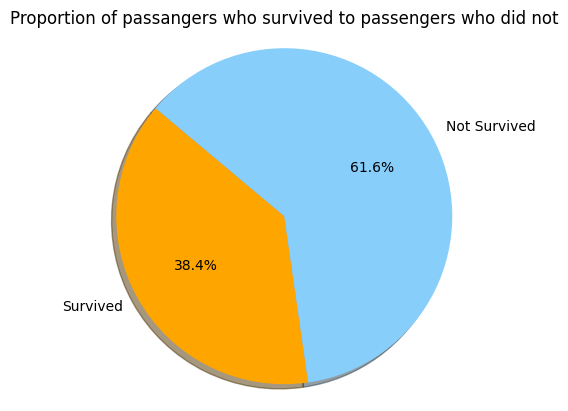

In [107]:
number_of_survived = (df_train['Survived'] == 1).sum()
number_of_not_survived = (df_train['Survived'] == 0).sum()

labels = ['Survived', 'Not Survived']
sizes = [number_of_survived, number_of_not_survived]
colors = ['orange', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of passangers who survived to passengers who did not')
plt.axis('equal')
plt.show()

*прокоментуйте отримані візуалізації

Як бачимо з діаграми, лише 38.4% пасижирів вижили, а 61,6% загинули.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


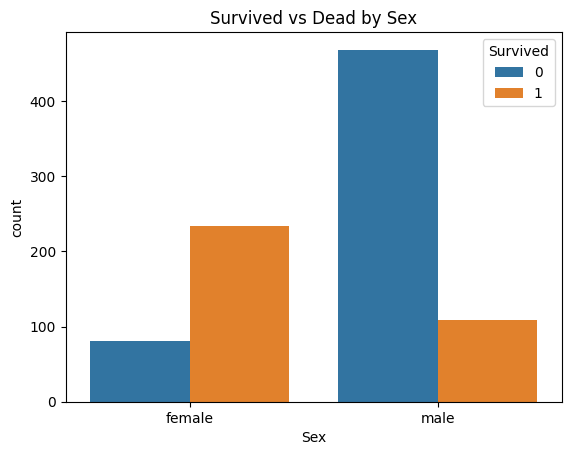

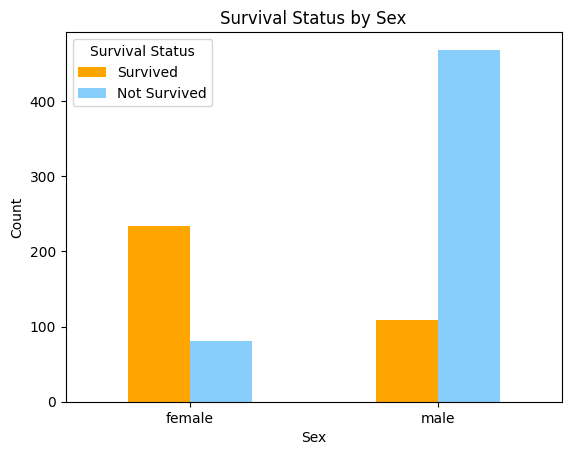

In [108]:
number_by_gender = df_train.groupby('Sex', as_index=False)['Survived'].size()
survived_by_gender = df_train.groupby('Sex', as_index=False)['Survived'].sum()
not_survived_by_gender = number_by_gender['size'] - survived_by_gender['Survived']
result = survived_by_gender.copy()
result['Not Survived'] = not_survived_by_gender

result.set_index('Sex').plot(kind='bar', stacked=False, color=colors)
plt.title('Survival Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survival Status')
plt.show()

*прокоментуйте отримані візуалізації

Як бачимо, випадки загибелі є як серед чоловіків, так і серед жінок. Але є суттєва відмінність в співвідношенні загиблих до виживших відносно статі: виживших жінок відносно більше ніж загиблих жінок, а загиблих чоловіків відносно більше ніж виживших чоловіків. Окрім того, ми бачимо, що незважаючи на те що абсолютна кількість чоловіків на кораблі була більше ніж кількість жінок, виживших жінок абсолютно більше ніж виживших чоловіків.

Це свідчить нам про те, що жінок рятували в першу чергу.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

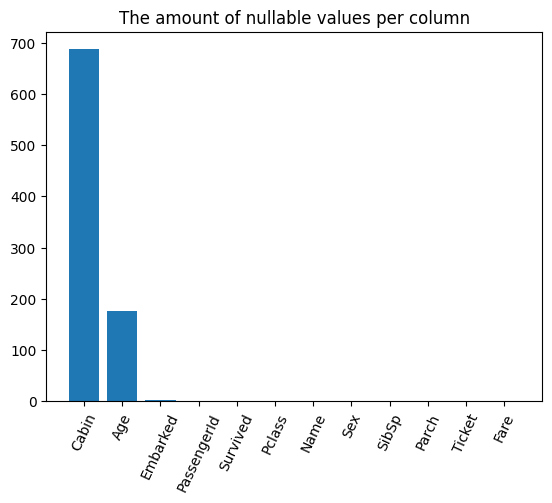

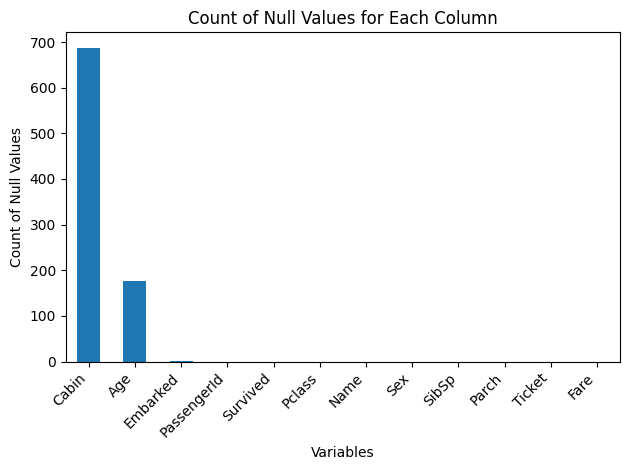

In [109]:
null_counts = df_train.isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)

sorted_null_counts.plot(kind='bar')
plt.title('Count of Null Values for Each Column')
plt.xlabel('Variables')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*прокоментуйте отримані візуалізації

Як бачимо, в більшості випадків ми не знаємо дані про кабіни пасажирів, в деяких випадках ми не знаємо вік пасажирів, та в двох випадках невідомо, в якому порту пасажири почали свою подорож на Титанику. Для інших змінних, всі дані відомі.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

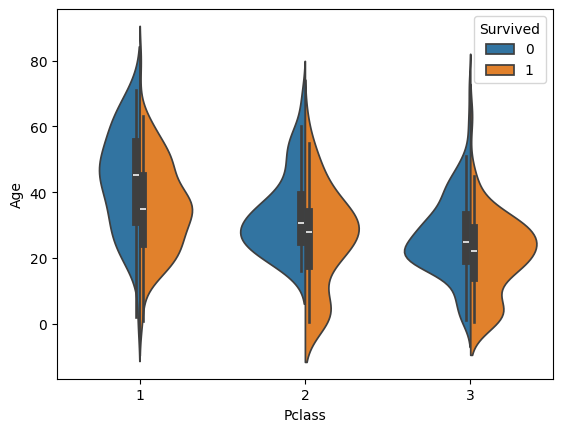

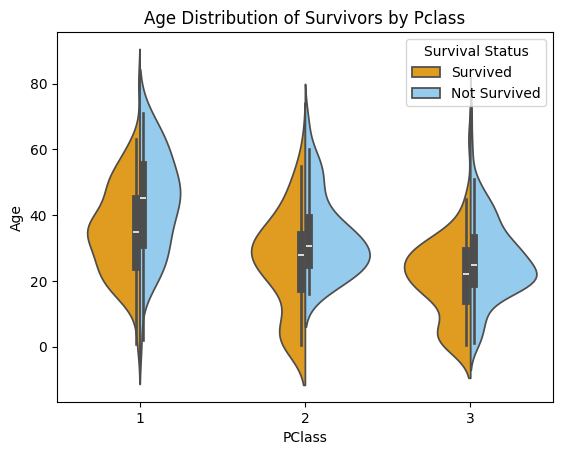

In [110]:
survival_labels = {0: 'Not Survived', 1: 'Survived'}
df_train_new = df_train.copy()
df_train_new['Survived_Label'] = df_train_new['Survived'].map(survival_labels)

sns.violinplot(x='Pclass', y='Age', hue='Survived_Label', data=df_train_new, split=True, palette=colors)

plt.title('Age Distribution of Survivors by Pclass')
plt.xlabel('PClass')
plt.ylabel('Age')
plt.legend(title='Survival Status')
plt.show()

*прокоментуйте отримані візуалізації

*Коментар: в прикладі, дані про виживших справа від ліній, а у мене навпаки - зліва, сподіваюсь за це не знімаються бали.*

Як бачимо, по-перше, на кораблі пасажири першого класу були в середньому старші ніж пасажири другого та третього класів. На це вказує медіана.

По-друге, медіана графіку вказує на те, що загиблі були в середньому старші за виживших, незалежно від класу.

По-третє, щільність графіку демонструє те, що серед пасажирів від 0 до 10 років є більше виживших ніж загиблих, що підтверджує факт, що дітей рятували першими. Цікаво, що для пасажирів другого класу майже всі діти були врятовані, але для третього, на жаль, є випадки загибелі.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


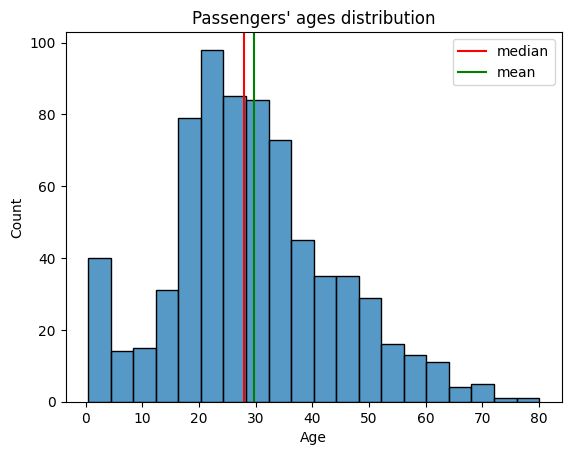

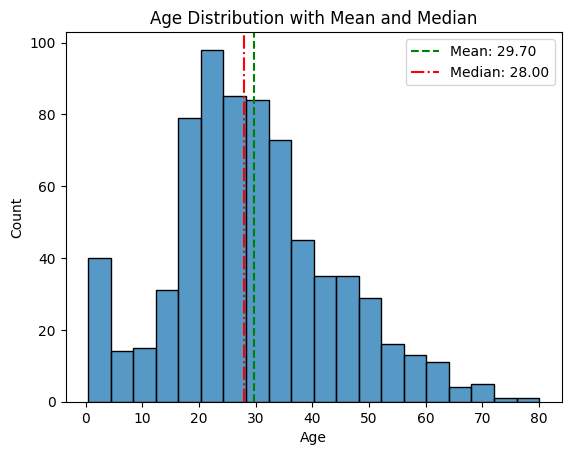

In [116]:
sns.histplot(df_train['Age'], bins=20, kde=False, edgecolor='black')
mean_age = df_train['Age'].mean()
median_age = df_train['Age'].median()

plt.axvline(mean_age, color='green', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='red', linestyle='-.', label=f'Median: {median_age:.2f}')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution with Mean and Median')
plt.legend()

plt.show()

*прокоментуйте отримані візуалізації

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних

В якому порту серед пасажирів, що сіли на корабель, було найбільше співвідношення пасажирів перешого класу?

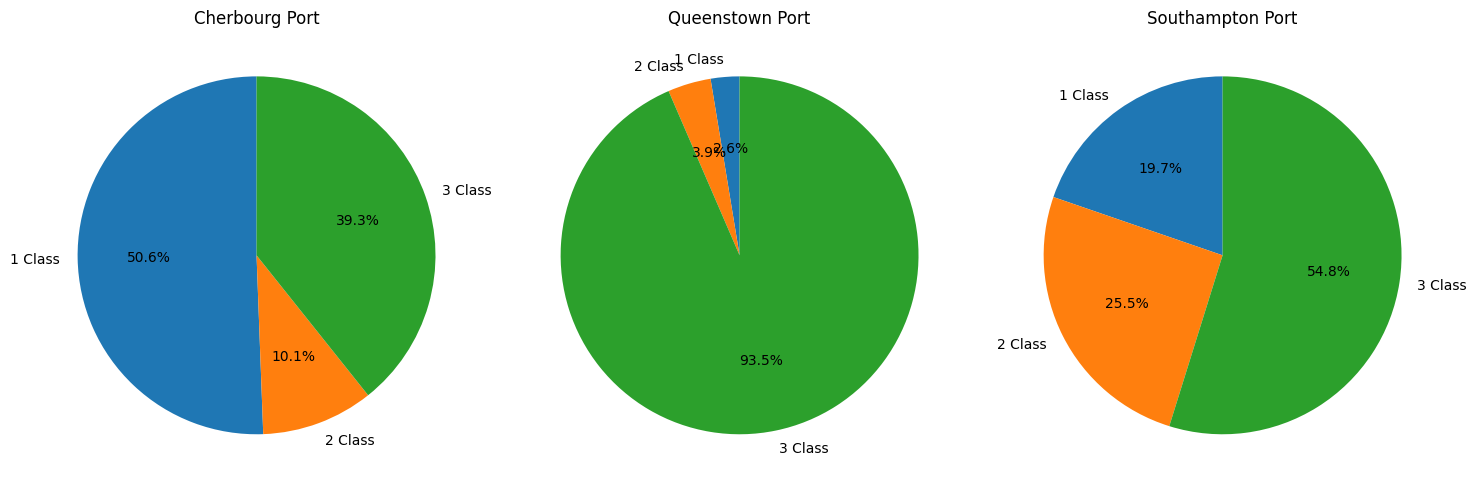

In [139]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

df_last = df_train.copy()
df_grouped = df_last.groupby(['Embarked', 'Pclass']).size()


for i, port in enumerate(['C', 'Q', 'S']):
    ax = axes[i]
    data_for_port = df_grouped.loc[port]
    labels = [f'{pclass} Class' for pclass in data_for_port.index]
    ax.pie(data_for_port, labels=labels, autopct='%1.1f%%', startangle=90)
    match port:
        case 'C':
            ax.set_title('Cherbourg Port')
        case 'Q':
            ax.set_title('Queenstown Port')
        case 'S':
            ax.set_title('Southampton Port')

plt.tight_layout()
plt.show()

*прокоментуйте отримані візуалізації

В порту Cherbourg співвідношення пасажирів з квитками першого класу було найбільше. Друге місце за співвідношенням посідає порт Southampton, а третє - Queenstown.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

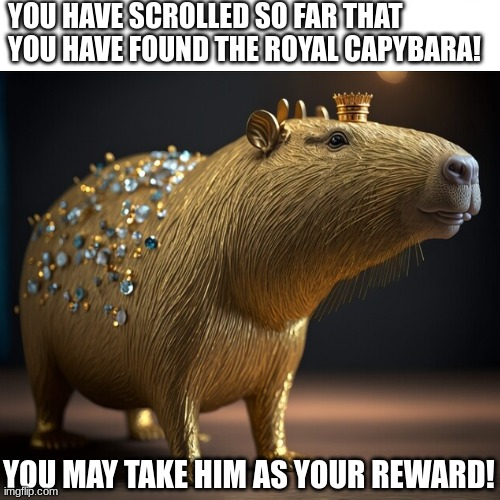